<a href="https://colab.research.google.com/github/TC3002B-Mariana/Actividad-4.1/blob/main/Actividad4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Actividad 4.1 - Proceso de la vida real como distribuciones de probabilidad**

Mariana Bustos Hernández - *a01641324*

**1. Selección del fenómeno:**
Cantidad de lluvia total mensual en Zapopan, Jalisco.

**2. Atributo medible:**
Milímetros(mm) de precipitación total al mes.

**3. Recolección de datos:**
Datos fuente:
Datos de la estación meteorológica de Zapopan, Jalisco (código de estación: 14169) proporcionados por la CONAGUA.

Enlace directo: [Normales Climatológicas - Estación 14169 (Jalisco)](https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Mensuales/jal/mes14169.txt)

Periodo: Datos mensuales históricos (normales climatológicas). Los datos proporcionados contienen registros mensuales de lluvia desde 1941 a 2020 en archivo "DatosLluviaZapopan.scv"

In [2]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv('DatosLluviaZapopan.csv')

# Eliminar columnas no necesarias (Total, Average, Months)
df = df.drop(['Total', 'Average', 'Months'], axis=1)

# Convertir a formato "long" (una fila por mes-año)
df_melted = df.melt(id_vars='Year', var_name='Month', value_name='Precipitacion')

# Eliminar filas con NaN
df_clean = df_melted.dropna()

print(df_clean['Precipitacion'].describe())

count     503.000000
mean      117.972505
std       208.013580
min         0.000000
25%         5.800000
50%        39.200000
75%       135.500000
max      1277.000000
Name: Precipitacion, dtype: float64


**4. Histograma de frecuencias**

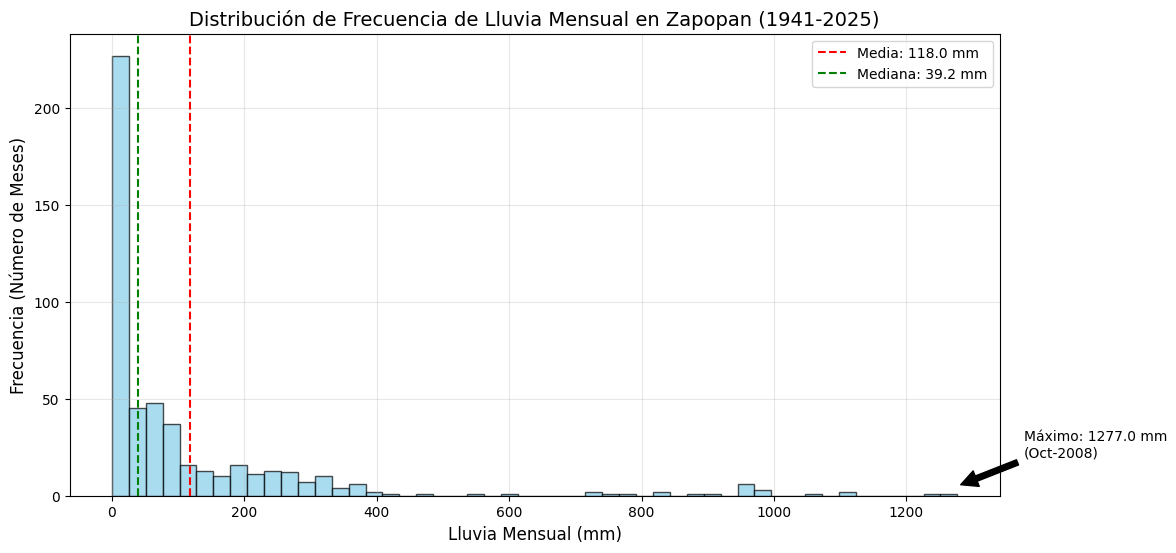

In [3]:
import matplotlib.pyplot as plt

# Configurar el histograma
plt.figure(figsize=(12, 6))
n_bins = 50  # Número de barras para mayor detalle
plt.hist(df_clean['Precipitacion'],  bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir líneas de referencia
mean_rainfall = df_clean['Precipitacion'].mean()
median_rainfall = df_clean['Precipitacion'].median()
plt.axvline(mean_rainfall, color='red', linestyle='--', label=f'Media: {mean_rainfall:.1f} mm')
plt.axvline(median_rainfall, color='green', linestyle='--', label=f'Mediana: {median_rainfall:.1f} mm')

# Personalización
plt.title('Distribución de Frecuencia de Lluvia Mensual en Zapopan (1941-2025)', fontsize=14)
plt.xlabel('Lluvia Mensual (mm)', fontsize=12)
plt.ylabel('Frecuencia (Número de Meses)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Mostrar valores atípicos
max_rain = df_clean['Precipitacion'].max()
plt.annotate(f'Máximo: {max_rain} mm\n(Oct-2008)',
             xy=(max_rain, 5), xytext=(max_rain + 100, 20),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.show()

**5. Ajuste de distribución con Fitter**



Fitting 114 distributions:  29%|██▉       | 33/114 [00:47<03:41,  2.74s/it]/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:3935: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:3935: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  in


 Mejor distribución:
{'betaprime': {'a': 0.9728735385875642, 'b': 0.55234343602451, 'loc': -8.352224584864524e-11, 'scale': 6.174447728836505}}

Todas las distribuciones:
anglit: (181.75185376132072, 529.0324734363687)
alpha: (3.736986730710281e-10, -1.0766659702028907, 2.4591567662583858)
arcsine: (-1.324740361801839e-23, 1310.4623819890608)
argus: (5.144728863476869e-07, -821.0490047937924, 2099.327340375064)
beta: (0.8689144467952804, 281.95075621043367, -4.5489079069392204e-26, 14467.116049690307)
betaprime: (0.9728735385875642, 0.55234343602451, -8.352224584864524e-11, 6.174447728836505)
bradford: (122.1926755667123, -3.1479017013897736e-07, 2795.3092909046663)
burr12: (0.9597570966729148, 0.3739783562242055, -4.654282004880431e-19, 2.6181205443179465)
cauchy: (20.537667819524657, 31.975586931576593)
burr: (0.2774211985122629, 3.1987390262038176, -9.134651684310482e-28, 0.05216803063119976)
chi: (0.37377938047838305, -2.0891640020952585e-25, 319.04367527342026)
chi2: (0.687478956

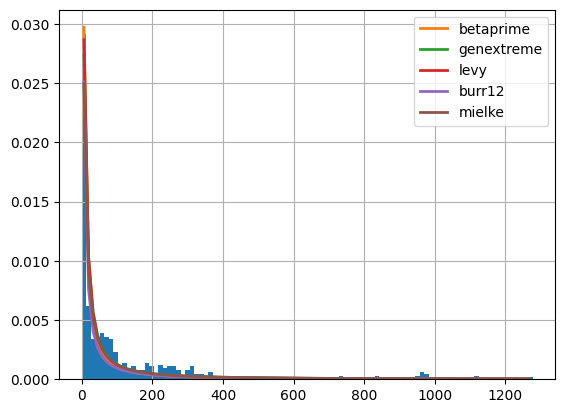

In [8]:
# First uninstall existing versions
!pip install fitter

from fitter import Fitter

fit = Fitter(df_clean['Precipitacion'])
fit.fit()
fit.summary()
best_dist = fit.get_best(method='sumsquare_error')
print("\n Mejor distribución:")
print(best_dist)

print("\nTodas las distribuciones:")
for distribution, params in fit.fitted_param.items():
    print(f"{distribution}: {params}")

**6. Parámetros de la distribución seleccionada**

De acuerdo, con la función de fitter, de sus 114 distribuciones la mejor es la distribución Betaprime. Con los parámetros:
`{'betaprime': {'a': 0.9728735385875642, 'b': 0.55234343602451, 'loc': -8.352224584864524e-11, 'scale': 6.174447728836505}}`




**7. Reflexión**

¿Cuáles son los parámetros de la distribución?

Los parámetros son `{'a': 0.9728735385875642, 'b': 0.55234343602451, 'loc': -8.352224584864524e-11, 'scale': 6.174447728836505}`

¿Cómo podrías utilizar el modelo creado?
El modelo se podría usar predecir cuánta lluvia se espera el próximo año, esto podría permiter tener una mejor planificación cultivos, drenaje urbano o gestión de inundaciones.

Para realizar predicciones de probabilidad de la cantidad de lluvia recibir.

¿Puedes usar distribuciones de probabilidad para identificar similitudes entre varios procesos?

Sí, se puede comparar la distribución de lluvias entre distintas regiones o ciudades del país y ver si tienen patrones similares. Si dos lugares tienen distribuciones similares, podrían compartir las mismas estrategias de manejo hídrico.

In [16]:
from scipy.stats import betaprime

a = best_dist['betaprime']['a']
b = best_dist['betaprime']['b']
loc = best_dist['betaprime']['loc']
scale = best_dist['betaprime']['scale']

# Probabilida de lluvia > 100mm
prob = 1 - betaprime.cdf(100, a=a, b=b, loc=loc, scale=scale)
print(f"P(X > 100mm) = {prob:.2%}")

# Lluvia promedio
median = betaprime.median(a=a, b=b, loc=loc, scale=scale)
print(f"Median rainfall: {median:.1f} mm")

synthetic_rainfall = betaprime.rvs(a=a, b=b, loc=loc, scale=scale, size=1000)

P(X > 100mm) = 20.42%
Median rainfall: 14.9 mm
